In [16]:
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.6f}".format

In [38]:
train_df = pd.read_csv(filepath_or_buffer="Z_values_10000.csv")
test_df = pd.read_csv(filepath_or_buffer="Z_values_100.csv")
validation_df = pd.read_csv(filepath_or_buffer="Z_values_100.csv")

train_df.head()

,0_0,0_1,1_0,1_1,2_0,2_1,3_0,3_1,4_0,4_1,...,7_1,8_0,8_1,9_0,9_1,decay_0,decay_1,W_0,W_1,J_0
0,1.000000,1.000000,0.640000,0.500000,-0.240000,-0.140000,-0.460000,-0.500000,-0.060000,0.000000,...,-0.740000,-0.200000,-0.180000,0.740000,0.660000,-0.022797,0.875160,3.356484,3.394981,4.338458
1,1.000000,1.000000,0.700000,0.480000,0.160000,-0.320000,-0.560000,-0.640000,-0.520000,-0.280000,...,-0.380000,-0.480000,-0.040000,-0.800000,0.700000,-0.305637,0.199690,2.780008,3.992448,3.203716
2,1.000000,1.000000,0.780000,0.520000,0.280000,-0.180000,-0.020000,-0.500000,0.060000,0.060000,...,-0.900000,0.400000,-0.520000,0.040000,0.280000,1.312289,1.518685,0.739418,2.991809,4.583140
3,1.000000,1.000000,0.720000,0.340000,-0.060000,-0.480000,-0.540000,-0.720000,-0.180000,-0.080000,...,0.060000,-0.940000,0.860000,-0.580000,0.880000,-0.060531,0.683886,2.639658,4.466349,3.975715
4,1.000000,1.000000,0.540000,0.500000,-0.160000,-0.300000,-0.460000,-0.500000,-0.320000,-0.240000,...,-0.500000,-0.540000,-0.020000,0.020000,0.800000,0.897697,0.344014,3.249551,3.779017,3.552987


In [56]:
from tensorflow.python.keras.regularizers import L2
import re
learning_rate = 0.0001
epochs = 100
batch_size = 1000

keys = train_df.keys()
keys.drop(['W_0', 'W_1', 'J_0'])
inputs = {key:tf.keras.layers.Input(shape=(1,), name=key) for key in keys}
concatenated_inputs = tf.keras.layers.concatenate(inputs.values())
# Prepare data for training
train_features = {key: train_df[key] for key in inputs}
train_labels = train_df[['W_0', 'W_1', 'J_0']]

# Similarly prepare test and validation data
test_features = {key: test_df[key] for key in inputs}
test_labels = test_df[['W_0', 'W_1', 'J_0']]

validation_features = {key: validation_df[key] for key in inputs}
validation_labels = validation_df[['W_0', 'W_1', 'J_0']]

#kernel_regularizer=L2(0.001)
hidden_layer_1 = tf.keras.layers.Dense(10, activation='relu')(concatenated_inputs)
hidden_layer_2 = tf.keras.layers.Dense(10, activation='relu')(hidden_layer_1)
hidden_layer_3 = tf.keras.layers.Dense(10, activation='relu')(hidden_layer_2)
hidden_layer_4 = tf.keras.layers.Dense(10, activation='relu')(hidden_layer_3)

output = tf.keras.layers.Dense(3)(hidden_layer_4) #TODO magic number

model = tf.keras.Model(inputs=inputs, outputs=output)
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='mean_squared_error')


In [57]:

# Train the model
# history = model.fit(train_features, train_labels, validation_data=(validation_features, validation_labels), epochs=epochs, batch_size=batch_size)
history = model.fit(train_features, train_labels, validation_split=0.2, epochs=epochs, batch_size=batch_size)

# Evaluate the model
model.evaluate(test_features, test_labels)

# Extract loss and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']

Epoch 1/1000
8/8 [==============================] - 1s 34ms/step - loss: 11.1601 - val_loss: 11.2214
Epoch 2/1000
8/8 [==============================] - 0s 14ms/step - loss: 11.0801 - val_loss: 11.1429
Epoch 3/1000
8/8 [==============================] - 0s 10ms/step - loss: 11.0033 - val_loss: 11.0669
Epoch 4/1000
8/8 [==============================] - 0s 11ms/step - loss: 10.9287 - val_loss: 10.9938
Epoch 5/1000
8/8 [==============================] - 0s 11ms/step - loss: 10.8569 - val_loss: 10.9234
Epoch 6/1000
8/8 [==============================] - 0s 13ms/step - loss: 10.7876 - val_loss: 10.8556
Epoch 7/1000
8/8 [==============================] - 0s 9ms/step - loss: 10.7212 - val_loss: 10.7901
Epoch 8/1000
8/8 [==============================] - 0s 10ms/step - loss: 10.6567 - val_loss: 10.7270
Epoch 9/1000
8/8 [==============================] - 0s 12ms/step - loss: 10.5950 - val_loss: 10.6659
Epoch 10/1000
8/8 [==============================] - 0s 12ms/step - loss: 10.5351 - val_loss

KeyboardInterrupt: 

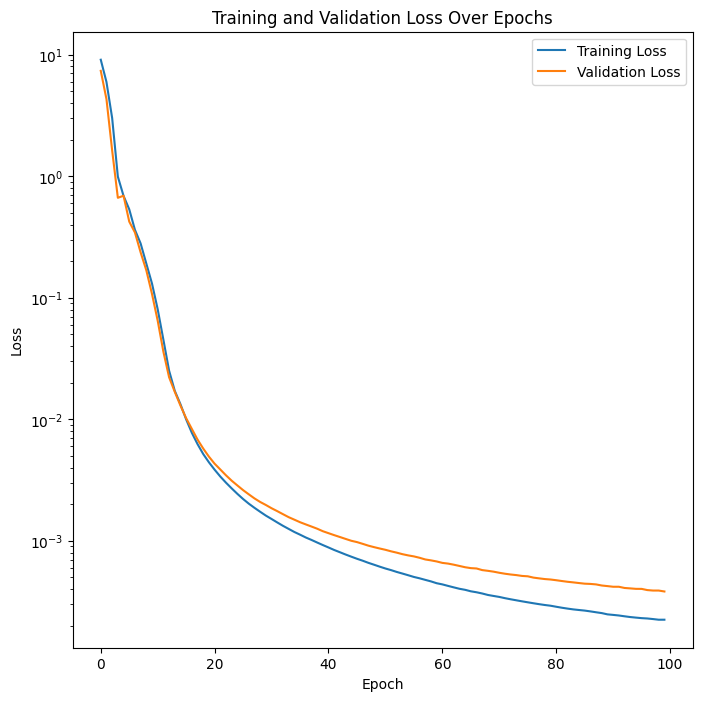

In [48]:
epochs_range = range(epochs)

# Plotting
plt.figure(figsize=(8, 8))
plt.plot(epochs_range, train_loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
#plt.xlim([1,epochs])
#plt.ylim([0,2])
plt.semilogy()
plt.show()

In [51]:
import numpy as np

new_data = pd.read_csv("Z_values_100.csv")
first_line = new_data.iloc[5]
correct_output = first_line[['W_0', 'W_1', 'J_0']].array
#input_data = {key: [first_line[key]] for key in inputs}
input_data = {key: np.array([first_line[key]]) for key in inputs}
predictions = model.predict(input_data)
print("Predicted values for W_0, W_1, J_0:", predictions[0])
print("Correct values for W_0, W_1, J_0:", correct_output)
print("the mean squared error is: ", 0.3*np.linalg.norm(predictions[0]-correct_output)**2)


1/1 [==============================] - 0s 46ms/step
Predicted values for W_0, W_1, J_0: [1.9449795 4.23119   3.344654 ]
Correct values for W_0, W_1, J_0: <PandasArray>
[1.944927777886473, 4.241159133574938, 3.3456689269079822]
Length: 3, dtype: float64
the mean squared error is:  3.0123639701783416e-05
